In [37]:
from desalination import *
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-notebook')
plt.rcParams.update({
    "figure.facecolor": (1.0, 1.0, 1.0, 1.0), #white with no transparency
    # "axes.facecolor": (1.0, 1.0, 1.0, 1.0), #white with no transparency
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0), #white with no transparency
    "savefig.pad_inches": 0.1,
    "savefig.bbox": 'tight'
})

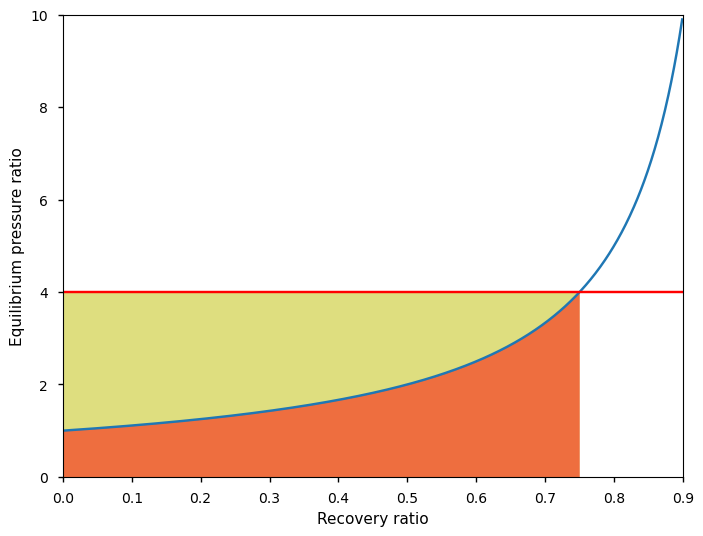

In [48]:
recovery = np.arange(0.0, 0.9, 0.001)
fig, ax = plt.subplots(figsize = (8, 6))

pressure_ratios = list(map(equilibrium_pressure_ratio, recovery))

sample_recovery = 0.75
sample_pr = equilibrium_pressure_ratio(sample_recovery)

ax.plot(recovery, pressure_ratios)
ax.axhline(sample_pr, color='r')
ax.set_ylabel('Equilibrium pressure ratio')
ax.set_xlabel('Recovery ratio')
plt.xlim(0.0, .90)
plt.ylim(0.0, 10.0)
plt.fill_between(x=recovery, y1=sample_pr, where=recovery<sample_recovery,color='y',alpha=0.5)
plt.fill_between(x=recovery, y1=equilibrium_pressure_ratio(recovery), where=recovery<sample_recovery,color='r',alpha=0.5)
plt.savefig("ro_wasted_energy.png")
plt.show()

In [40]:
seawater_molar_c = seawater_concentration/salt_molecular_mass*1000

op = vant_hoff_osmotic_pressure(seawater_molar_c, seawater_temp)
op

2919523.237363107

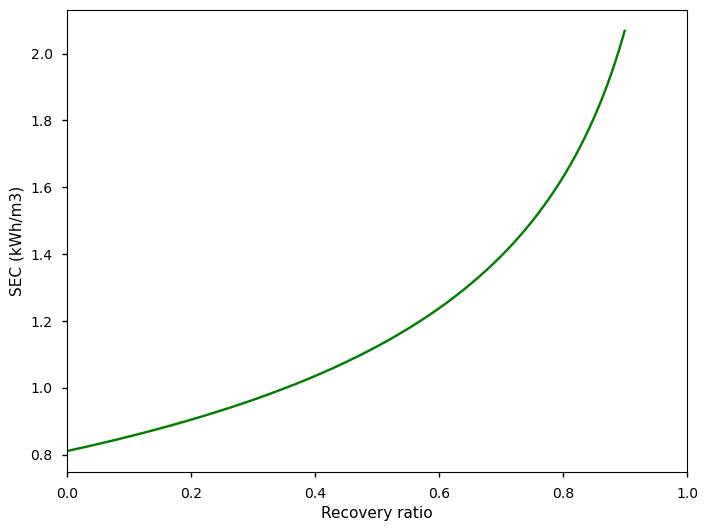

In [46]:
recovery = np.arange(0.001, 0.9, 0.001)
fig, ax = plt.subplots(figsize = (8, 6))

SEC = list(map(lambda r: specific_energy_consumption(op, r)/1e3/3600, recovery))

ax.plot(recovery, SEC, 'g')
ax.set_ylabel('SEC (kWh/m3)')
ax.set_xlabel('Recovery ratio')
plt.xlim(0.0, 1.0)
plt.savefig("ro_sec.png")
plt.show()

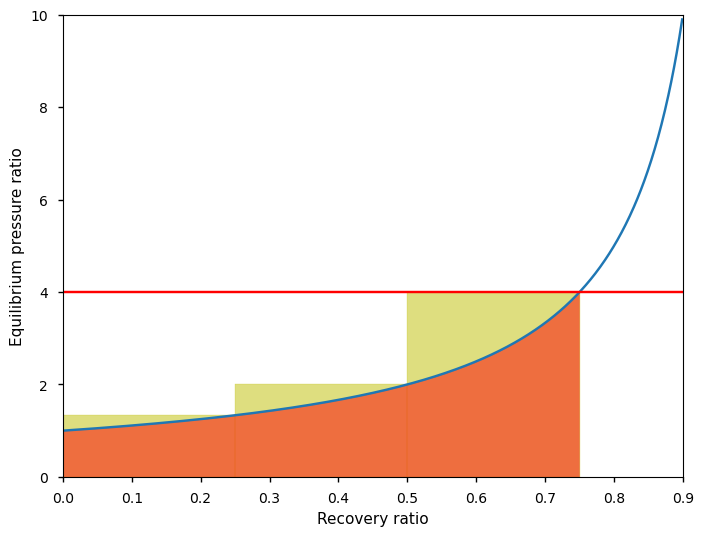

In [47]:
recovery = np.arange(0.0, 0.9, 0.001)
fig, ax = plt.subplots(figsize = (8, 6))

pressure_ratios = list(map(equilibrium_pressure_ratio, recovery))

sample_recovery_1 = 0.25
sample_recovery_2 = 0.50
sample_recovery_3 = 0.75

sample_pr_1 = equilibrium_pressure_ratio(sample_recovery_1)
sample_pr_2 = equilibrium_pressure_ratio(sample_recovery_2)
sample_pr_3 = equilibrium_pressure_ratio(sample_recovery_3)

ax.plot(recovery, pressure_ratios)
ax.axhline(sample_pr, color='r')
ax.set_ylabel('Equilibrium pressure ratio')
ax.set_xlabel('Recovery ratio')
plt.xlim(0.0, .90)
plt.ylim(0.0, 10.0)
plt.fill_between(x=recovery, y1=sample_pr_1, where=recovery<=sample_recovery_1,color='y',alpha=0.5)
plt.fill_between(x=recovery, y1=sample_pr_2, where=(recovery>=sample_recovery_1)&(recovery<=sample_recovery_2),color='y',alpha=0.5)
plt.fill_between(x=recovery, y1=sample_pr_3, where=(recovery>=sample_recovery_2)&(recovery<=sample_recovery_3),color='y',alpha=0.5)
plt.fill_between(x=recovery, y1=equilibrium_pressure_ratio(recovery), where=recovery<sample_recovery_3,color='r',alpha=0.5)
plt.savefig("ro_wasted_energy_staged.png")
plt.show()